In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('spotify.csv')
df.head()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,Female,54.0,CA,Free,26.0,23.0,0.20,Desktop,31.0,0.0,1.0
1,Other,33.0,DE,Family,141.0,62.0,0.34,Web,0.0,1.0,0.0
2,Male,38.0,AU,Premium,199.0,38.0,0.04,Mobile,0.0,1.0,1.0
3,Female,22.0,CA,Student,36.0,2.0,0.31,Mobile,0.0,1.0,0.0
4,Other,29.0,US,Family,250.0,57.0,0.36,Mobile,0.0,1.0,1.0


In [3]:
df.describe()


,age,listening_time,songs_played_per_day,skip_rate,ads_listened_per_week,offline_listening,is_churned
count,7964.000000,7954.000000,7955.000000,7965.000000,7951.000000,7951.000000,7939.000000
mean,37.671396,154.092909,50.121433,0.300117,6.940888,0.747579,0.258597
std,12.744404,84.028601,28.437105,0.173553,13.608406,0.434429,0.437891
min,16.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,81.000000,25.000000,0.150000,0.000000,0.000000,0.000000
50%,38.000000,154.000000,50.000000,0.300000,0.000000,1.000000,0.000000
75%,49.000000,227.000000,75.000000,0.450000,5.000000,1.000000,1.000000
max,59.000000,299.000000,99.000000,0.600000,49.000000,1.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 7955 non-null   object 
 1   age                    7964 non-null   float64
 2   country                7961 non-null   object 
 3   subscription_type      7953 non-null   object 
 4   listening_time         7954 non-null   float64
 5   songs_played_per_day   7955 non-null   float64
 6   skip_rate              7965 non-null   float64
 7   device_type            7954 non-null   object 
 8   ads_listened_per_week  7951 non-null   float64
 9   offline_listening      7951 non-null   float64
 10  is_churned             7939 non-null   float64
dtypes: float64(7), object(4)
memory usage: 687.6+ KB


In [5]:
df.isnull().sum()

gender                   45
age                      36
country                  39
subscription_type        47
listening_time           46
songs_played_per_day     45
skip_rate                35
device_type              46
ads_listened_per_week    49
offline_listening        49
is_churned               61
dtype: int64

In [6]:
def missin_values(data):
    if np.issubdtype(data.dtype,np.number):
        return data.fillna(data.median())
    else:
        return data.fillna(data.mode()[0])

In [7]:
df['gender']=missin_values(df['gender'])
df['age']=missin_values(df['age'])
df['country']=missin_values(df['country'])
df['subscription_type']=missin_values(df['subscription_type'])
df['listening_time']=missin_values(df['listening_time'])
df['songs_played_per_day']=missin_values(df['songs_played_per_day'])
df['skip_rate']=missin_values(df['skip_rate'])
df['ads_listened_per_week']=missin_values(df['ads_listened_per_week'])
df['offline_listening']=missin_values(df['offline_listening'])
df['is_churned']=missin_values(df['is_churned'])
df['device_type']=missin_values(df['device_type'])

In [8]:
df.isnull().sum()

gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'age'),
  Text(2, 0, 'listening_time'),
  Text(3, 0, 'songs_played_per_day'),
  Text(4, 0, 'skip_rate'),
  Text(5, 0, 'ads_listened_per_week'),
  Text(6, 0, 'offline_listening'),
  Text(7, 0, 'is_churned')])

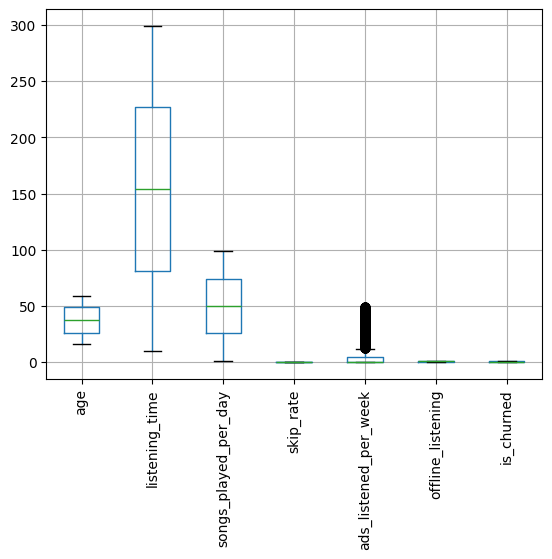

In [9]:
numeric=df.select_dtypes('number')
numeric.boxplot()
plt.xticks(rotation=90)

In [10]:
def outlier_detect(data):
    q1=np.percentile(data,25,method='midpoint')
    q3=np.percentile(data,75,method='midpoint')
    iqr=q3-q1

    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)

    outlier_condition=(data<lower) | (data>upper)
    outliers=data[outlier_condition]
    outlier_index=data[outlier_condition].index

    return outliers,outlier_index,(len(outliers)/len(data))*100

In [11]:
outlier,indices,perct=outlier_detect(df['ads_listened_per_week'])

In [12]:
outlier

0       31.0
5       13.0
9       44.0
10      37.0
11      39.0
        ... 
7969    46.0
7979    44.0
7989    29.0
7992    49.0
7993    40.0
Name: ads_listened_per_week, Length: 1673, dtype: float64

In [13]:
indices

Index([   0,    5,    9,   10,   11,   26,   27,   35,   49,   52,
       ...
       7908, 7923, 7926, 7936, 7959, 7969, 7979, 7989, 7992, 7993],
      dtype='int64', length=1673)

In [14]:
perct

20.9125

In [15]:
lower=np.percentile(df['ads_listened_per_week'],25,method='midpoint')
upper=np.percentile(df['ads_listened_per_week'],75,method='midpoint')

df['ads_listened_per_week']=df['ads_listened_per_week'].clip(lower=lower,upper=upper)

<Axes: ylabel='ads_listened_per_week'>

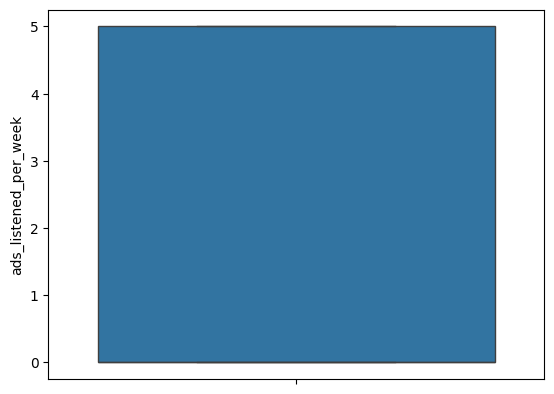

In [16]:
sns.boxplot(df['ads_listened_per_week'])

In [17]:
df.reset_index(drop=True)

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,Female,54.0,CA,Free,26.0,23.0,0.20,Desktop,5.0,0.0,1.0
1,Other,33.0,DE,Family,141.0,62.0,0.34,Web,0.0,1.0,0.0
2,Male,38.0,AU,Premium,199.0,38.0,0.04,Mobile,0.0,1.0,1.0
3,Female,22.0,CA,Student,36.0,2.0,0.31,Mobile,0.0,1.0,0.0
4,Other,29.0,US,Family,250.0,57.0,0.36,Mobile,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7995,Other,44.0,DE,Student,237.0,36.0,0.30,Mobile,0.0,1.0,1.0
7996,Male,34.0,AU,Premium,61.0,64.0,0.59,Mobile,0.0,1.0,0.0
7997,Female,17.0,US,Free,81.0,62.0,0.33,Desktop,5.0,0.0,0.0
7998,Female,34.0,IN,Student,154.0,94.0,0.27,Desktop,0.0,1.0,0.0


In [18]:
churn_rate=df.groupby('gender')['is_churned'].mean().reset_index()
churn_rate

,gender,is_churned
0,Female,0.261544
1,Male,0.249355
2,Other,0.259175


<Axes: xlabel='gender', ylabel='is_churned'>

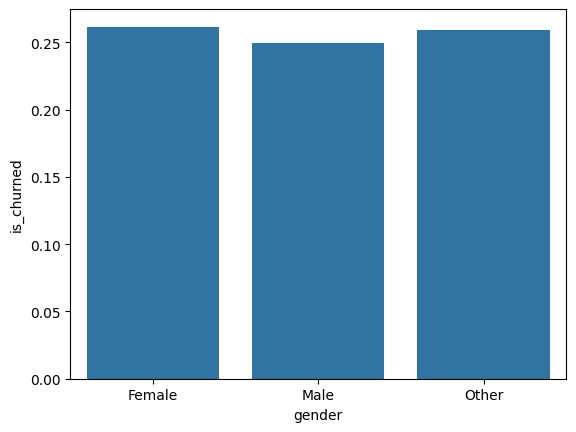

In [19]:
sns.barplot(x='gender',y='is_churned',data=churn_rate)

In [20]:
df.head()

,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,Female,54.0,CA,Free,26.0,23.0,0.20,Desktop,5.0,0.0,1.0
1,Other,33.0,DE,Family,141.0,62.0,0.34,Web,0.0,1.0,0.0
2,Male,38.0,AU,Premium,199.0,38.0,0.04,Mobile,0.0,1.0,1.0
3,Female,22.0,CA,Student,36.0,2.0,0.31,Mobile,0.0,1.0,0.0
4,Other,29.0,US,Family,250.0,57.0,0.36,Mobile,0.0,1.0,1.0


In [21]:
df1=pd.get_dummies(df['gender']).astype(int)
df=pd.concat([df,df1],axis=1)

In [22]:
df=pd.concat([df,df1],axis=1)

In [23]:
df.drop('gender',axis=1,inplace=True)

In [24]:
df['country'].unique()

array(['CA', 'DE', 'AU', 'US', 'UK', 'IN', 'FR', 'PK'], dtype=object)

In [25]:
freq=df['country'].value_counts()
df['country']=df['country'].map(freq)

In [26]:
df.head()

,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,Female,Male,Other,Female,Male,Other
0,54.0,953,Free,26.0,23.0,0.20,Desktop,5.0,0.0,1.0,1,0,0,1,0,0
1,33.0,1014,Family,141.0,62.0,0.34,Web,0.0,1.0,0.0,0,0,1,0,0,1
2,38.0,1023,Premium,199.0,38.0,0.04,Mobile,0.0,1.0,1.0,0,1,0,0,1,0
3,22.0,953,Student,36.0,2.0,0.31,Mobile,0.0,1.0,0.0,1,0,0,1,0,0
4,29.0,1065,Family,250.0,57.0,0.36,Mobile,0.0,1.0,1.0,0,0,1,0,0,1


In [27]:
df['subscription_type'].unique()

array(['Free', 'Family', 'Premium', 'Student'], dtype=object)

In [28]:
import category_encoders as ce

In [29]:
X=df['subscription_type']
y=df['is_churned']

In [30]:
encoder=ce.TargetEncoder(cols=['subscription_type'])
df['subscription_type']=encoder.fit_transform(X,y)

In [31]:
df.head()

,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,Female,Male,Other,Female,Male,Other
0,54.0,953,0.245396,26.0,23.0,0.20,Desktop,5.0,0.0,1.0,1,0,0,1,0,0
1,33.0,1014,0.274168,141.0,62.0,0.34,Web,0.0,1.0,0.0,0,0,1,0,0,1
2,38.0,1023,0.247092,199.0,38.0,0.04,Mobile,0.0,1.0,1.0,0,1,0,0,1,0
3,22.0,953,0.261673,36.0,2.0,0.31,Mobile,0.0,1.0,0.0,1,0,0,1,0,0
4,29.0,1065,0.274168,250.0,57.0,0.36,Mobile,0.0,1.0,1.0,0,0,1,0,0,1


In [32]:
df['device_type'].unique()

array(['Desktop', 'Web', 'Mobile'], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['device_type']=encoder.fit_transform(df[['device_type']])

d:\py311_env\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [34]:
df.head()

,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,Female,Male,Other,Female,Male,Other
0,54.0,953,0.245396,26.0,23.0,0.20,0,5.0,0.0,1.0,1,0,0,1,0,0
1,33.0,1014,0.274168,141.0,62.0,0.34,2,0.0,1.0,0.0,0,0,1,0,0,1
2,38.0,1023,0.247092,199.0,38.0,0.04,1,0.0,1.0,1.0,0,1,0,0,1,0
3,22.0,953,0.261673,36.0,2.0,0.31,1,0.0,1.0,0.0,1,0,0,1,0,0
4,29.0,1065,0.274168,250.0,57.0,0.36,1,0.0,1.0,1.0,0,0,1,0,0,1


C:\Users\moham\AppData\Local\Temp\ipykernel_21396\2598144018.py:21: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\py311_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\py311_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


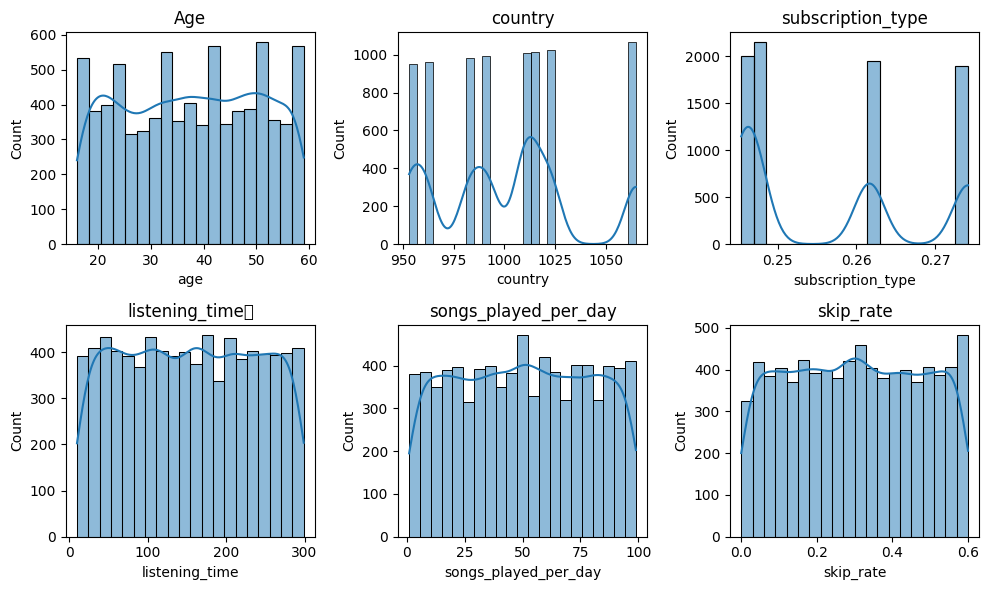

In [35]:
fig,axes=plt.subplots(2,3,figsize=(10,6))

sns.histplot(df['age'],kde=True,ax=axes[0,0])
axes[0,0].set_title('Age')

sns.histplot(df['country'],kde=True,ax=axes[0,1])
axes[0,1].set_title('country')

sns.histplot(df['subscription_type'],kde=True,ax=axes[0,2])
axes[0,2].set_title('subscription_type')

sns.histplot(df['listening_time'],kde=True,ax=axes[1,0])
axes[1,0].set_title('listening_time	')

sns.histplot(df['songs_played_per_day'],kde=True,ax=axes[1,1])
axes[1,1].set_title('songs_played_per_day')

sns.histplot(df['skip_rate'],kde=True,ax=axes[1,2])
axes[1,2].set_title('skip_rate')

plt.tight_layout()


In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['age']=scaler.fit_transform(df[['age']])
df['country']=scaler.fit_transform(df[['country']])
df['subscription_type']=scaler.fit_transform(df[['subscription_type']])
df['listening_time']=scaler.fit_transform(df[['listening_time']])

In [37]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df['songs_played_per_day']=scaler.fit_transform(df[['songs_played_per_day']])
df['skip_rate']=scaler.fit_transform(df[['skip_rate']])


In [38]:
df.head()

,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned,Female,Male,Other,Female,Male,Other
0,0.883721,0.000000,0.000000,0.055363,-0.956464,-0.578166,0,5.0,0.0,1.0,1,0,0,1,0,0
1,0.395349,0.544643,1.000000,0.453287,0.418944,0.230327,2,0.0,1.0,0.0,0,0,1,0,0,1
2,0.511628,0.625000,0.058944,0.653979,-0.427461,-1.502159,1,0.0,1.0,1.0,0,1,0,0,1,0
3,0.139535,0.000000,0.565716,0.089965,-1.697068,0.057078,1,0.0,1.0,0.0,1,0,0,1,0,0
4,0.302326,1.000000,1.000000,0.830450,0.242610,0.345826,1,0.0,1.0,1.0,0,0,1,0,0,1


C:\Users\moham\AppData\Local\Temp\ipykernel_21396\2598144018.py:21: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\py311_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
d:\py311_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


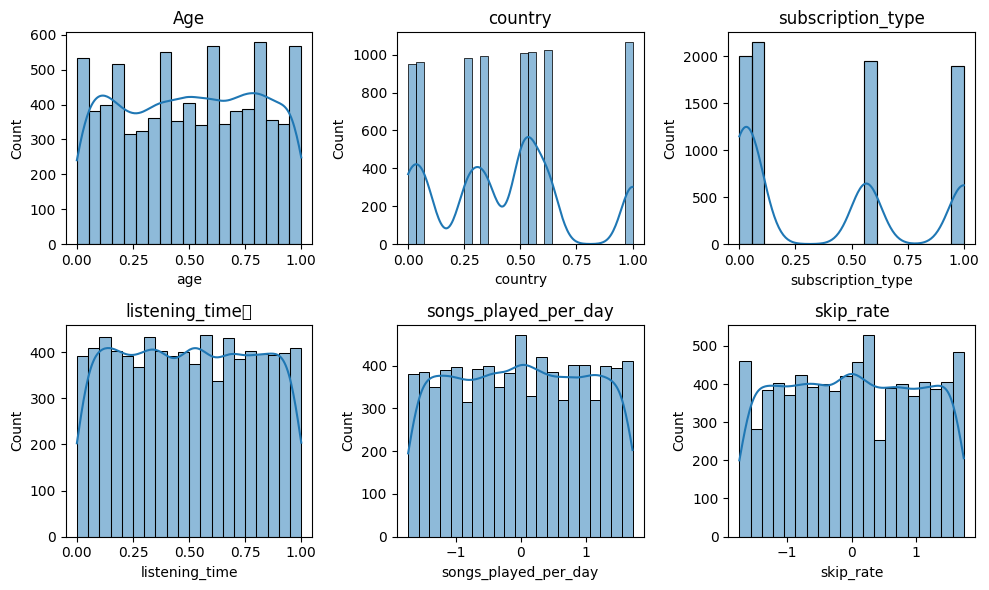

In [39]:
fig,axes=plt.subplots(2,3,figsize=(10,6))

sns.histplot(df['age'],kde=True,ax=axes[0,0])
axes[0,0].set_title('Age')

sns.histplot(df['country'],kde=True,ax=axes[0,1])
axes[0,1].set_title('country')

sns.histplot(df['subscription_type'],kde=True,ax=axes[0,2])
axes[0,2].set_title('subscription_type')

sns.histplot(df['listening_time'],kde=True,ax=axes[1,0])
axes[1,0].set_title('listening_time	')

sns.histplot(df['songs_played_per_day'],kde=True,ax=axes[1,1])
axes[1,1].set_title('songs_played_per_day')

sns.histplot(df['skip_rate'],kde=True,ax=axes[1,2])
axes[1,2].set_title('skip_rate')

plt.tight_layout()
